In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('../data/process_v1/process_data_5.csv')

In [68]:
df

,numberOfFloors,numberOfBathRooms,numberOfBedRooms,certificateOfLandUseRight,ward,street,district,city,lat,lon,...,distance_hn_Hàng Khay,distance_hn_Hàng Trống,distance_hn_Hàng Hành,distance_hn_Phố Hai Bà Trưng,distance_hn_Phố Lý Thường Kiệt,distance_hn_Phố Bà Triệu,distance_hn_Hàng Bài,distance_hn_Phố Hai Bà Trưng(Hoàn Kiếm),distance_district,target
0,1,NaN,NaN,0,0,0,0,0,21.036403,105.727235,...,9.450133,9.416401,9.433240,9.402095,9.411188,9.445093,9.435854,9.433688,9.404118,92.000000
1,5,5.0,4.0,1,1,1,1,0,20.985272,105.843605,...,8.423630,8.481227,8.543236,8.423707,8.377326,8.051868,8.301442,8.401147,8.012053,102.857143
2,4,NaN,NaN,1,2,2,2,0,20.978546,105.796775,...,8.931940,8.924143,8.972384,8.879267,8.866793,8.772982,8.861183,8.903859,9.910879,97.500000
3,7,7.0,7.0,1,3,3,3,0,21.028933,105.855453,...,6.598654,6.956718,6.761142,7.156634,7.141550,7.581442,7.109375,6.869687,7.695956,1375.000000
4,4,NaN,NaN,1,4,4,4,0,21.046094,105.800236,...,8.622254,8.530771,8.551876,8.516947,8.551225,8.704269,8.624514,8.592451,8.628126,534.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170959,1,2.0,2.0,0,119,600,9,0,21.001092,105.869070,...,8.144654,8.276105,8.302429,8.257995,8.201712,7.903704,8.078461,8.165627,7.980783,38.571429
170960,6,10.0,10.0,0,231,358,11,0,20.999584,105.817799,...,8.384273,8.369235,8.451888,8.289643,8.267210,8.118311,8.261364,8.334477,7.724700,155.333333
170961,8,22.0,22.0,1,164,574,10,0,21.029128,105.886118,...,8.256108,8.350590,8.297314,8.398680,8.382899,8.404012,8.333913,8.312352,9.010103,304.878049
170962,5,NaN,NaN,1,35,125,15,0,21.017355,105.775199,...,8.953748,8.907498,8.944352,8.875072,8.883976,8.911851,8.916458,8.924393,8.647240,157.971014


In [69]:
lat_lon_df = df[['lat', 'lon']].drop_duplicates()
lat_lon_df

,lat,lon
0,21.036403,105.727235
1,20.985272,105.843605
2,20.978546,105.796775
3,21.028933,105.855453
4,21.046094,105.800236
...,...,...
169898,10.761879,106.700807
170206,10.875113,106.652996
170571,10.745290,106.539112
170588,10.778074,106.685171


In [70]:
(lat_lon_df['lon'].min(), lat_lon_df['lon'].max())

(105.3065795, 106.969481)

In [71]:
import quads

In [72]:
tree = quads.QuadTree((15.86914545, 106.13803025), 12 , 2)

In [73]:
lat_list, lon_list = lat_lon_df['lat'].tolist(), lat_lon_df['lon'].tolist()
lat_lon_tuple_list = [(lat, lon) for lat, lon in zip(lat_list, lon_list)]
print(len(lat_lon_tuple_list))

3848


In [74]:
for lat_lon_tuple in lat_lon_tuple_list[:500]:
    tree.insert(lat_lon_tuple)

In [75]:
lat_lon_tuple in tree

True

In [76]:
found = tree.nearest_neighbors(lat_lon_tuple, count=4)
print(found)

[<Point: (10.802529, 106.639643)>, <Point: (10.797893, 106.6376362)>, <Point: (10.805946, 106.63519)>, <Point: (10.807598, 106.634793)>]


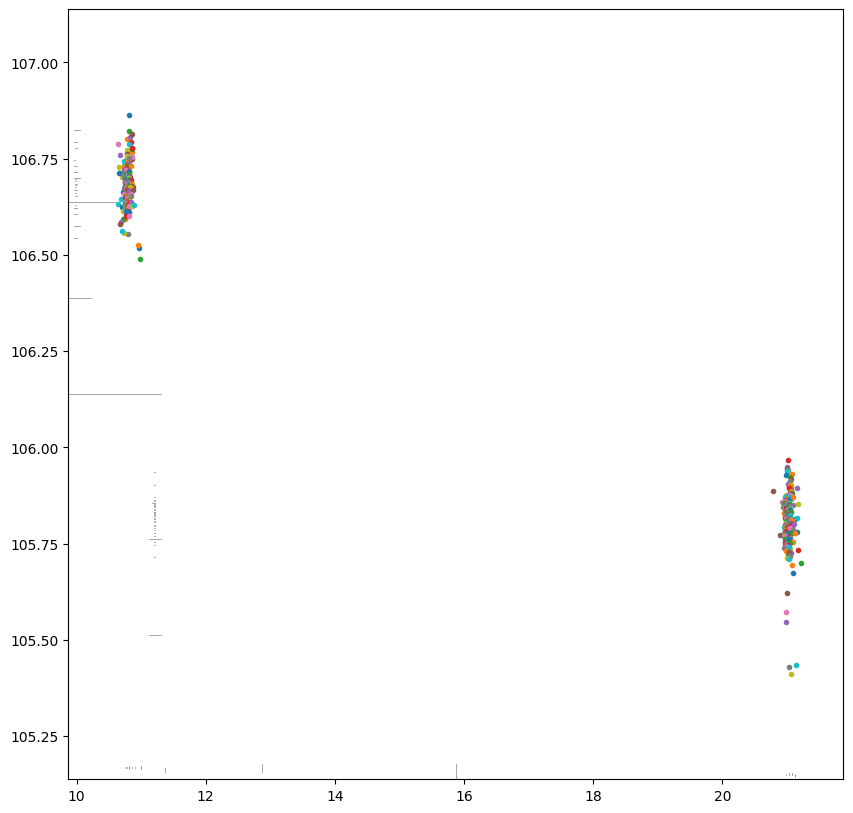

In [77]:
quads.visualize(tree)